In [1]:
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

print(tensorflow.__version__)

2.1.0


## Make more images

In [2]:
train_dir = r'./train'
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=30,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_dir = r'./test'
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  target_size = (150, 150),
                                                  batch_size = 20,
                                                  class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size = (150, 150),
                                                 batch_size = 20,
                                                 class_mode = 'categorical')

Found 3935 images belonging to 2 classes.
Found 1688 images belonging to 2 classes.


In [3]:
label_map = train_generator.class_indices

In [4]:
label_map

{'NONgeorg': 0, 'georgies': 1}

## Make and learn model

In [3]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (150, 150, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [4]:
log_tb = r'./TBoard'
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_tb, histogram_freq=1, embeddings_freq=1)
checkpoints = keras.callbacks.ModelCheckpoint("softmax_seq_weight.h5", monitor='val_accuracy',
                                             save_weights_only=True, mode='max', verbose=1)

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


In [5]:
history = model.fit(train_generator,
                   epochs=100,
                   steps_per_epoch=20,
                   validation_data=test_generator,
                   verbose=1,
                   validation_steps=3,
                   callbacks=[checkpoints, tensorboard_callback])

model.save('Model-Seq-softmax.h5')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 3 steps
Epoch 1/100
19/20 [===========================>..] - ETA: 0s - loss: 1.2229 - accuracy: 0.5947
Epoch 00001: saving model to softmax_seq_weight.h5
20/20 [==============================] - 11s 557ms/step - loss: 1.2129 - accuracy: 0.5925 - val_loss: 0.6657 - val_accuracy: 0.6500
Epoch 2/100
19/20 [===========================>..] - ETA: 0s - loss: 0.6478 - accuracy: 0.6579
Epoch 00002: saving model to softmax_seq_weight.h5
20/20 [==============================] - 10s 489ms/step - loss: 0.6482 - accuracy: 0.6550 - val_loss: 0.6261 - val_accuracy: 0.6667
Epoch 3/100
19/20 [===========================>..] - ETA: 0s - loss: 0.7047 - accuracy: 0.6526
Epoch 00003: saving model to softmax_seq_weight.h5
20/20 [==============================] - 10s 518ms/step - loss: 0.7095 - accuracy: 0.6425 - val_loss: 0.6569 - val_accuracy: 0.6833
Epoch 4/100
19/20 [===========================>..] - ETA: 0s - loss: 0.6692

## Plot results

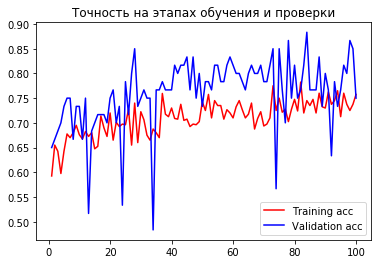

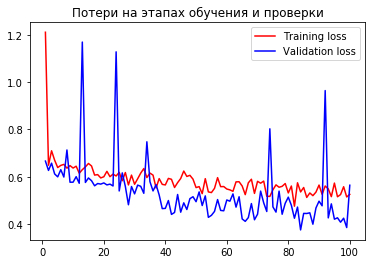

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('Model_softmax-acc.png', dpi=500, facecolor='white')

plt.figure()


plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.savefig('Model_softmax-loss.png', dpi=500, facecolor='white')
plt.show()


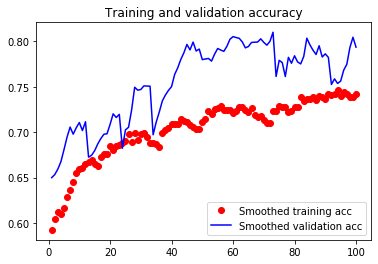

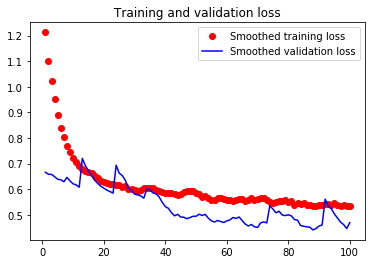

In [7]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'ro', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('smooth-Model_softmax-acc.png', dpi=500, facecolor='white')

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'ro', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('smooth-Model_softmax-loss-150.png', dpi=500, facecolor='white')

plt.show()